In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
pd.set_option("display.precision", 3)

# Predict the power output of a plant based on historical readings
Data is in Excel file. After reading, print first two rows

In [52]:
#Read an Excel worksheet
file = '/Users/isethi/Downloads/CCPP/ccpp.xlsx'# Select the file
xl = pd.ExcelFile(file)#This loads the file
df = xl.parse('Sheet1')# Loads sheet1 as dataframeprint(df.shape)
print(df[0:2])

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37


In [53]:
#Correlation matrix
corr = df[0:100].corr()
print(corr)

       AT      V     AP     RH     PE
AT  1.000  0.863 -0.448 -0.486 -0.950
V   0.863  1.000 -0.368 -0.236 -0.881
AP -0.448 -0.368  1.000 -0.012  0.432
RH -0.486 -0.236 -0.012  1.000  0.306
PE -0.950 -0.881  0.432  0.306  1.000


# Convert data to numpy array; Separate independent and dependent variables
# Visualize each independent variable wrt output variable

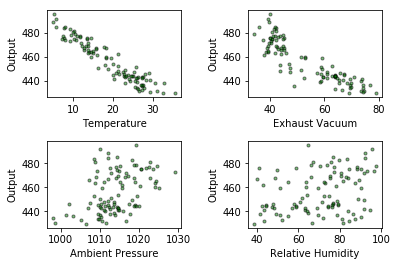

In [54]:
data = np.array(df[0:100])
X = data[:,:-1]
Y = data[:,-1]
heading = ['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.scatter(X[:, i], Y,c = 'g',marker = ".",edgecolor='k', alpha = 0.50)
    plt.xlabel(heading[i])
    plt.ylabel('Output')
plt.subplots_adjust(wspace=0.50, hspace=0.50)
plt.show()

# Lets divide the data into training and test sets

In [55]:
split = int(0.7*X.shape[0])
print (split)

70


In [56]:
X_train = X[:split,:]
Y_train = Y[:split]
X_test = X[split:,:]
Y_test = Y[split:]

In [57]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

In [58]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
mse = np.mean((Y_test-Y_pred)**2)
print('mse: \n',mse)

Coefficients: 
 [-2.32024685 -0.0303063  -0.13458604 -0.2022868 ]
Intercept: 
 653.7252298935637
mse: 
 18.431693401310625


In [59]:
print('regr.Score: \n',regr.score(X_test,Y_test))# Score closed to 1 is a perfect fit; 
#close to 0 means no linear relationship

regr.Score: 
 0.9365276088114


In [60]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(LinearRegression(), X_train, Y_train, cv=10))

0.8938592147745295

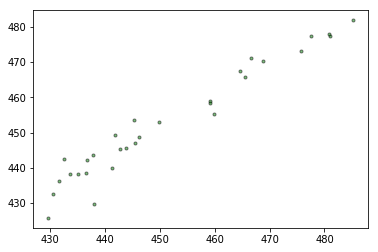

In [61]:
plt.scatter(Y_test, Y_pred,c = 'g',marker = ".",edgecolor='k', alpha = 0.50)
plt.show()

In [106]:
#Now add another highly correlated feature
XC= X[:,0,None]#0.001*np.random.normal()
X0 = np.append(X,XC,1)#adds a col 
X_train = X0[:split,:]
X_test = X0[split:,:]

In [107]:
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

In [108]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
mse = np.mean((Y_test-Y_pred)**2)
print('mse: \n',mse)
print('regr.Score: \n',regr.score(X_test,Y_test))# Score closed to 1 is a perfect fit; close to 0 means no linear relationship
np.mean(cross_val_score(LinearRegression(), X_train, Y_train, cv=10))

Coefficients: 
 [-1.16012342 -0.0303063  -0.13458604 -0.2022868  -1.16012342]
Intercept: 
 653.7252298935632
mse: 
 18.43169340131063
regr.Score: 
 0.9365276088114


0.8938592147745295

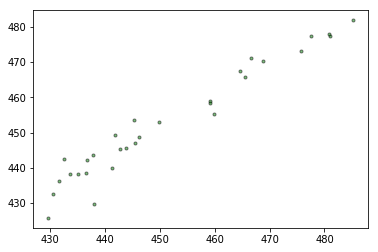

In [109]:
plt.scatter(Y_test, Y_pred,c = 'g',marker = ".",edgecolor='k', alpha = 0.50)
plt.show()

In [75]:
XC = X[:,0]

In [76]:
print(XC[0:2])

[14.96 25.18]


In [92]:
print(X.shape)

(100, 4)
